#### Lecture notes by Mr Akhona.
#### 25 March.
#### Topic : ML, Tensorflow API.

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
med = pd.read_csv("indians.csv")
med.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [26]:
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Number_pregnant        768 non-null    int64  
 1   Glucose_concentration  768 non-null    float64
 2   Blood_pressure         768 non-null    float64
 3   Triceps                768 non-null    float64
 4   Insulin                768 non-null    float64
 5   BMI                    768 non-null    float64
 6   Pedigree               768 non-null    float64
 7   Age                    768 non-null    int64  
 8   Class                  768 non-null    int64  
 9   Group                  768 non-null    object 
dtypes: float64(6), int64(3), object(1)
memory usage: 60.1+ KB


In [27]:
med.describe()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,33.240885,0.348958
std,3.369578,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,24.000000,0.000000
50%,3.000000,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,29.000000,0.000000
75%,6.000000,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,41.000000,1.000000
max,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.000000,1.000000


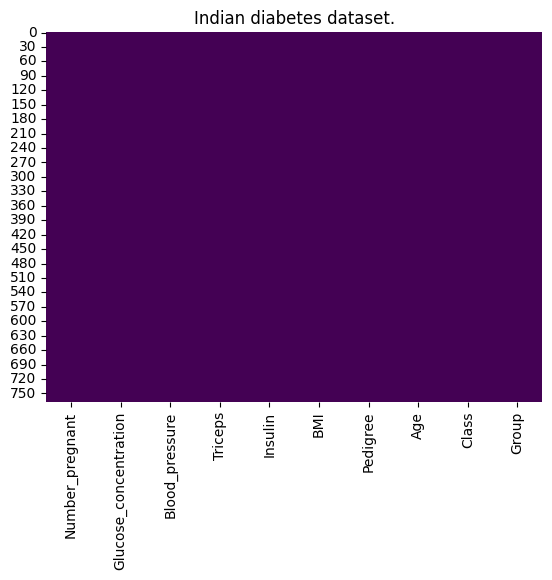

In [28]:
sns.heatmap(med.isnull(), cbar=False, cmap='viridis')
plt.title('Indian diabetes dataset.')
plt.show()   # The dataset is 100% clean, its more like University dataset.

In [29]:
# Normalise your data.

# med.columns
normalise = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

# delete class, since it will be your y = Class.
# delete string columns, since we can only normalise numericals.
# delete age & turn into a catagorical column.

med[normalise] = med[normalise].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
med.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [30]:
# Lets create feature columns.
# Start with continues values & follow with categorical values.


import tensorflow as tf 

# continues values.

num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma = tf.feature_column.numeric_column('Glucose_concentration')
blood = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

# categorical values.

assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10) # hash_size=10 - how many categories in that column.

<Axes: >

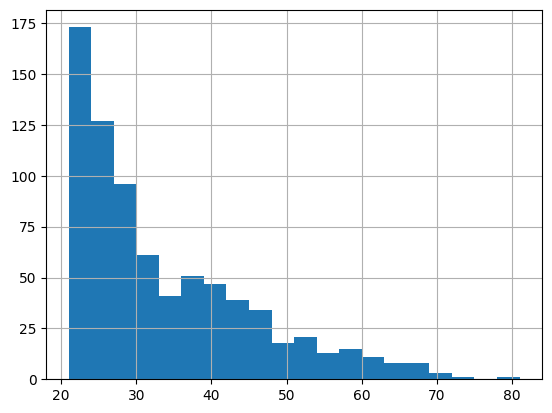

In [31]:
# Convert a continues column into a categorical column, Age.
# Reason why we didnt normalise age.

med['Age'].hist(bins = 20)  # mostlt young people.

In [32]:
age_bucket = tf.feature_column

In [33]:
# lets convert age to a categorical.

age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [34]:
feature_columns = [num_preg, plasma, blood, tricep, insulin, bmi, diabetes, age_bucket]

In [35]:
# ML.
# Train-Test split.

# X.
x_data = med.drop('Class', axis = 1)
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [36]:
# Y.
labels = med['Class']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.2, random_state=101)

In [39]:
# Model dev.

# function = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)
# Code above will give you error, cause the latest tf 2.0 no longer has that feature. Instead us:

# Enable TensorFlow 1.x behavior (if using TensorFlow 2.x)
tf.compat.v1.disable_eager_execution()

# Use pandas_input_fn from compat.v1
function = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True
)

In [40]:
model = tf.estimator.LinearClassifier(feature_columns=feature_columns, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\HPPROB~1\\AppData\\Local\\Temp\\tmprk8fbh6v', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [41]:
model.train(input_fn=function, steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\HPPROB~1\AppData\Local\Temp\tmprk8fbh6v\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving check

In [48]:
# Evaluate our model.

# evaluation = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)
# The error occurs because, as mentioned earlier, tf.estimator.inputs.pandas_input_fn has been deprecated in TensorFlow 2.x and is no longer available.

# Disable eager execution (required for Estimator API)
tf.compat.v1.disable_eager_execution()

# Create a tf.data.Dataset from pandas DataFrame for the test data
def eval_input_fn():
    test_dataset = tf.data.Dataset.from_tensor_slices((dict(X_test), y_test))
    test_dataset = test_dataset.batch(10)
    return test_dataset

# Evaluate the model
evaluation = model.evaluate(input_fn=eval_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2025-03-25T14:09:52
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\HPPROB~1\AppData\Local\Temp\tmprk8fbh6v\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.40224s
INFO:tensorflow:Finished evaluation at 2025-03-25-14:09:54
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7467533, accuracy_baseline = 0.66883117, auc = 0.8190558, auc_precision_recall = 0.63392127, average_loss = 0.5185111, global_step = 1000, label/mean = 0.33116883, loss = 0.5260265, precision = 0.62, prediction/mean = 0.39002705, recall = 0.60784316
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\HPPROB~1\AppData\Local\Temp\tmprk8fbh6v\model.ckpt-1000


In [49]:
results = model.evaluate(eval_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2025-03-25T14:10:41
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\HPPROB~1\AppData\Local\Temp\tmprk8fbh6v\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.36526s
INFO:tensorflow:Finished evaluation at 2025-03-25-14:10:43
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7467533, accuracy_baseline = 0.66883117, auc = 0.8190558, auc_precision_recall = 0.63392127, average_loss = 0.5185111, global_step = 1000, label/mean = 0.33116883, loss = 0.5260265, precision = 0.62, prediction/mean = 0.39002705, recall = 0.60784316
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\HPPROB~1\AppData\Local\Temp\tmprk8fbh6v\model.ckpt-1000


In [50]:
# Model results.

results

{'accuracy': 0.7467533,
 'accuracy_baseline': 0.66883117,
 'auc': 0.8190558,
 'auc_precision_recall': 0.63392127,
 'average_loss': 0.5185111,
 'label/mean': 0.33116883,
 'loss': 0.5260265,
 'precision': 0.62,
 'prediction/mean': 0.39002705,
 'recall': 0.60784316,
 'global_step': 1000}

In [52]:
# Lets get predictions.

# prediction = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)
# The error you're encountering happens because tf.estimator.inputs.pandas_input_fn has been deprecated in TensorFlow 2.x and no longer exists

# Create a tf.data.Dataset from pandas DataFrame for the test data
def predict_input_fn():
    # Convert X_test into a dataset
    test_dataset = tf.data.Dataset.from_tensor_slices(dict(X_test))
    
    # Batch the dataset
    test_dataset = test_dataset.batch(10)
    
    return test_dataset

# Get predictions from the model
predictions = model.predict(input_fn=predict_input_fn)

# If you want to convert the predictions into a list (for example)
predictions_list = list(predictions)

# Example: Print the first 5 predictions
for prediction in predictions_list[:5]:
    print(prediction)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\HPPROB~1\AppData\Local\Temp\tmprk8fbh6v\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'logits': array([0.05737281], dtype=float32), 'logistic': array([0.51433927], dtype=float32), 'probabilities': array([0.48566067, 0.5143392 ], dtype=float32), 'class_ids': array([1], dtype=int64), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}
{'logits': array([0.5706835], dtype=float32), 'logistic': array([0.6389209], dtype=float32), 'probabilities': array([0.36107916, 0.6389209 ], dtype=float32), 'class_ids': array([1], dtype=int64), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}
{'logits': array([-0.23778772], dtype=float32), 'logistic': ar

In [55]:
# pred = model.predict(predictions)
# my_pred = list(pred)
# my_pred

# Get predictions from the model
pred = model.predict(input_fn=predict_input_fn)

# Convert predictions to a list
my_pred = list(pred)

# Example: Print the first 5 predictions
for prediction in my_pred[:5]:
    print(prediction)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\HPPROB~1\AppData\Local\Temp\tmprk8fbh6v\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'logits': array([0.05737281], dtype=float32), 'logistic': array([0.51433927], dtype=float32), 'probabilities': array([0.48566067, 0.5143392 ], dtype=float32), 'class_ids': array([1], dtype=int64), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}
{'logits': array([0.5706835], dtype=float32), 'logistic': array([0.6389209], dtype=float32), 'probabilities': array([0.36107916, 0.6389209 ], dtype=float32), 'class_ids': array([1], dtype=int64), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}
{'logits': array([-0.23778772], dtype=float32), 'logistic': ar

In [56]:
my_pred

[{'logits': array([0.05737281], dtype=float32),
  'logistic': array([0.51433927], dtype=float32),
  'probabilities': array([0.48566067, 0.5143392 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.5706835], dtype=float32),
  'logistic': array([0.6389209], dtype=float32),
  'probabilities': array([0.36107916, 0.6389209 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.23778772], dtype=float32),
  'logistic': array([0.4408316], dtype=float32),
  'probabilities': array([0.5591684, 0.4408316], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {

In [57]:
# Neural Net model.

dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feature_columns, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\HPPROB~1\\AppData\\Local\\Temp\\tmpptyglr8r', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
